
# Actividad 1: Preprocesamiento de Datos

**Objetivo:** La finalidad de la presente actividad es aplicar los conocimientos teóricos adquiridos durante la unidad 2 preprocesamiento de datos. En este contexto, se llevarán a cabo diversas acciones bajo los siguientes subtemas:

1. Limpieza de Datos
2. Transformación de Datos
3. Selección de Características
4. Reducción de Datos


Para la ejecución de estas etapas, se empleará un conjunto de datos ampliamente reconocido en el ámbito de la minería de datos, denominado "Titanic - Machine Learning from Disaster". Este conjunto de datos se encuentra disponible en el repositorio Kaggle, accesible mediante el siguiente enlace: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data?select=test.csv). Adicionalmente, se proporciona un diccionario del conjunto de datos y una explicación detallada en el siguiente enlace: [Diccionario y Explicación del Conjunto de Datos](https://www.kaggle.com/competitions/titanic/data).

Se insta a los participantes a seguir rigurosamente los subtemas mencionados y a utilizar las fuentes de información proporcionadas para llevar a cabo el proceso de preprocesamiento de datos de manera efectiva y fundamentada. La aplicación práctica de los conceptos teóricos contribuirá al desarrollo de habilidades cruciales en el ámbito de la mineria de datos.



# 0. Cargar el Conjunto de Datos:
1. Descargar el conjunto de datos denominado **train.csv** desde la competición Titanic - Machine Learning from Disaster.

2. Subir el archivo train.csv a Google Colab mediante la función de arrastre y suelta, o utilizando la opción de carga de archivos.

3. Importar el archivo utilizando la biblioteca Pandas. ** Se recomienda revisar y, si es necesario, modificar la ruta del archivo en la siguiente línea de código para asegurar la correcta carga de datos. **

In [56]:
# Importar pandas
import pandas as pd

# Modificar la ruta del archivo si es necesario
ruta_archivo = "/content/train.csv"
datos_titanic = pd.read_csv(ruta_archivo)


# 1. Limpieza de datos:

Inicialmente, es imperativo verificar la importación exitosa del conjunto de datos. A tal efecto, se procederá a visualizar el dataframe denominado datos_titanic. Este paso garantizará la correcta carga de datos y permitirá continuar con las etapas subsiguientes de la actividad.

La inspección visual de las primeras filas (.head) del conjunto de datos facilitará la identificación de posibles problemas de importación y sienta las bases para la aplicación de técnicas de limpieza de datos.

In [39]:
datos_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


El data set contiene el siguiente diccionario:

| Variable  | Definición                                | Clave                                      |
|------------|--------------------------------------------|--------------------------------------------|
| survival   | Supervivencia                              | 0 = No, 1 = Sí                            |
| pclass     | Clase del billete                          | 1 = 1ra, 2 = 2da, 3 = 3ra                 |
| sex        | Género                                     |                                            |
| Age        | Edad en años                               |                                            |
| sibsp      | # de hermanos/cónyuges a bordo del Titanic |                                            |
| parch      | # de padres/hijos a bordo del Titanic      |                                            |
| ticket     | Número de boleto                           |                                            |
| fare       | Tarifa del pasajero                        |                                            |
| cabin      | Número de cabina                           |                                            |
| embarked   | Puerto de embarque                         | C = Cherbourg, Q = Queenstown, S = Southampton |

Además:

- Variable Notes
pclass: Un indicador de la situación socioeconómica (SES)
  * 1st = Alta
  * 2nd = Media
  * 3rd = Baja

- age: La edad es fraccionaria si es inferior a 1. Si la edad es estimada, es en forma de xx.5

- sibsp: el conjunto de datos define las relaciones familiares de esta manera...
  * Sibling = hermano, hermana, hermanastro, hermanastra
  * Spouse = esposo, esposa (amantes y prometidos fueron ignorados)

- parch: El conjunto de datos define así las relaciones familiares...
  * Parent = madre, padre
  * Child = hija, hijo, hijastra, hijastro
  * Some children travelled only with a nanny, therefore parch=0 for them.

Una forma general de ver el tipo de información que almacena nuestro dataframe es mediante .info()

In [40]:
datos_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


La función describe en Pandas es una herramienta útil para obtener estadísticas descriptivas de un DataFrame, como la media, la desviación estándar, los valores mínimos y máximos, los cuartiles, entre otros. Se utiliza comúnmente para realizar un análisis inicial y obtener una comprensión rápida de la distribución de los datos en un conjunto de datos.


Nota puedes transponer el dataframe descriptivo utilizando .T, esto ayudará a presentar los descriptivos de una manera más optima

In [41]:
datos_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Esto proporcionará estadísticas descriptivas para todas las columnas numéricas del DataFrame.

Sin embargo, el parámetro include permite especificar el tipo de datos que se incluirá en el resumen estadístico. Algunos de los valores posibles para include son:

* 'all': Incluye todas las columnas, independientemente de su tipo de datos.

* 'number': Incluye solo columnas numéricas.
* 'object': Incluye solo columnas de tipo objeto (cadenas u otros tipos de datos no numéricos).
* 'category': Incluye solo columnas de tipo categoría.
Por ejemplo, para obtener estadísticas descriptivas solo para columnas de tipo objeto y número, se puede utilizar:

In [42]:
datos_titanic.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [43]:
datos_titanic.describe(include=['float64','int64']).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Valores faltantes:

Para detectar valores nulos en un DataFrame de Pandas, se puede utilizar el método isnull() junto con el método sum(). Este enfoque proporciona el recuento de valores nulos en cada columna.

In [44]:
datos_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Los resultados indican que:

* PassengerId: No tiene valores nulos. Todos los registros tienen una identificación de pasajero.

* Survived: No tiene valores nulos. Todos los registros tienen información sobre la supervivencia.

* Pclass: No tiene valores nulos. Todos los registros tienen información sobre la clase del billete.

* Name: No tiene valores nulos. Todos los registros tienen información sobre el nombre del pasajero.

* Sex: No tiene valores nulos. Todos los registros tienen información sobre el género del pasajero.

* Age: Tiene 177 valores nulos. Hay 177 registros sin información sobre la edad del pasajero.

* SibSp: No tiene valores nulos. Todos los registros tienen información sobre el número de hermanos/cónyuges a bordo.

* Parch: No tiene valores nulos. Todos los registros tienen información sobre el número de padres/hijos a bordo.

* Ticket: No tiene valores nulos. Todos los registros tienen información sobre el número de boleto.

* Fare: No tiene valores nulos. Todos los registros tienen información sobre la tarifa del pasajero.

* Cabin: Tiene 687 valores nulos. La mayoría de los registros (687) no tienen información sobre el número de cabina.

* Embarked: Tiene 2 valores nulos. Hay 2 registros sin información sobre el puerto de embarque.

Esta interpretación te brinda una visión general de la integridad de los datos en cada columna. Puedemos considerar estrategias como imputación de valores para las edades faltantes o la eliminación de la columna "Cabin" si la falta de datos es significativa.

### Eliminación de una columna:

Asegurarnos que más del 20% de los registros en Cabin son faltantes

In [45]:
# Calcula el porcentaje de valores nulos en la columna "Cabin"
porcentaje_nulos_cabin = (datos_titanic['Cabin'].isnull().sum() / len(datos_titanic)) * 100

# Compara si el porcentaje es mayor del 20%
if porcentaje_nulos_cabin > 20:
    print(f'Más del 20% de los registros en la columna "Cabin" son faltantes ({porcentaje_nulos_cabin:.2f}%)')
else:
    print(f'El porcentaje de valores nulos en la columna "Cabin" es {porcentaje_nulos_cabin:.2f}%, no supera el 20%')

Más del 20% de los registros en la columna "Cabin" son faltantes (77.10%)


Eliminar la columna completa:

Si decides eliminar la columna completa "Cabin" debido a que más del 20% de sus registros son valores nulos, puedes utilizar el método drop de Pandas. Aquí tienes un ejemplo de cómo hacerlo:


In [46]:
datos_titanic = datos_titanic.drop(columns = ["Cabin"])
# Alternativa
# datos_titanic.drop('Cabin', axis=1, inplace=True)

datos_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Imputación o eliminación de registros (filas):

* La imputación es preferible cuando la cantidad de datos faltantes es baja o cuando la pérdida de información es crítica.

* La eliminación puede ser apropiada si la cantidad de datos faltantes es considerable y no se pueden aplicar métodos de imputación de manera efectiva.

En general, es crucial evaluar las implicaciones de la imputación o eliminación en el contexto específico del análisis y considerar el impacto en la calidad y validez de los resultados. La elección entre estas estrategias debe basarse en un entendimiento profundo del conjunto de datos y los objetivos del análisis.

#### Elimiación de registros

In [47]:
# Mostrar el dataframe actual
datos_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Eliminaremos los unicos dos registros nulos de la columna Embarked utilizando el método dropna()

In [48]:
# Elimina las filas donde la columna "Embarked" sea nula
datos_titanic = datos_titanic.dropna(subset=['Embarked'])

# Muestra el DataFrame resultante
datos_titanic

# Nota que la catidad de fila se ha reducido de 891 a 889

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Imputación de registros

Para realizar la imputación de los valores nulos en la columna "Age" del DataFrame datos_titanic, puedes utilizar diferentes estrategias de imputación, como reemplazar los valores nulos con la media, la mediana o utilizando técnicas más avanzadas como la imputación basada en modelos predictivos.

Mostremos primero los estadisticos descriptivos de Age

In [57]:
# Calcula el porcentaje de valores nulos en la columna "Age"
porcentaje_nulos_cabin = (datos_titanic['Age'].isnull().sum() / len(datos_titanic)) * 100

# Compara si el porcentaje es mayor del 20%
if porcentaje_nulos_cabin > 20:
    print(f'Más del 20% de los registros en la columna "Age" son faltantes ({porcentaje_nulos_cabin:.2f}%)')
else:
    print(f'El porcentaje de valores nulos en la columna "Age" es {porcentaje_nulos_cabin:.2f}%, no supera el 20%')

El porcentaje de valores nulos en la columna "Age" es 19.87%, no supera el 20%


In [49]:
datos_titanic["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

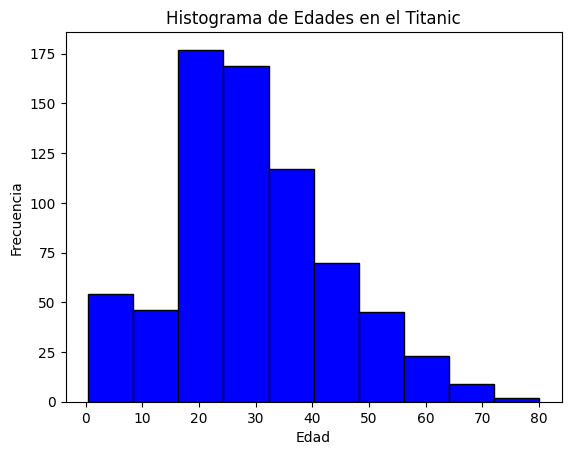

In [50]:
import matplotlib.pyplot as plt
# Crear un histograma de la columna "Age"
plt.hist(datos_titanic['Age'], color='blue', edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma de Edades en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

visualmente el histograma no se percibe un sesgo evidente en la distribución de la columna "Age" y la distribución parece aproximadamente simétrica, entonces utilizar la media como valor para imputar los datos nulos podría ser una elección razonable, para ello:

In [53]:
# Calcula la media de la columna "Age"
media_edad = datos_titanic['Age'].mean()

# Imputa los valores nulos en "Age" con la media
datos_titanic['Age'].fillna(media_edad, inplace=True)

datos_titanic

<ipython-input-53-14ce6281e794>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_titanic['Age'].fillna(media_edad, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Para verificar la completitud del conjunto de datos procesados y mostrar el recuento de los valores nulos en todo el DataFrame, puedes utilizar el siguiente código:

In [54]:
# Verificar y mostrar el recuento de valores nulos en todo el DataFrame
print(datos_titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Resumen:

Luego de realizar el preprocesamiento de datos, que incluyó la eliminación e imputación de valores nulos en columnas y filas del conjunto de datos del Titanic, se pueden obtener varias conclusiones:

1. **Integridad del Conjunto de Datos:**
   - La imputación y/o eliminación de valores nulos ayudaron a mejorar la integridad del conjunto de datos.
   - Se logró reducir o eliminar los valores nulos en las columnas específicas que fueron procesadas.

2. **Preservación de Registros Relevantes:**
   - La eliminación de filas con valores nulos puede haber llevado a la pérdida de algunos registros, pero esta acción puede ser justificada si los registros eliminados no eran críticos para el análisis.
   - La imputación permitió preservar registros al asignar valores estimados en lugar de eliminarlos.

3. **Impacto en la Distribución de Datos:**
   - La imputación de valores nulos en la columna 'Age' con la media podría haber tenido un impacto en la distribución de edades, particularmente si había una cantidad significativa de valores nulos.
   - La eliminación de registros o columnas también puede influir en la distribución de otras variables.

4. **Consideraciones sobre Sesgo:**
   - Se asumió que la imputación con la media en la columna 'Age' era apropiada debido a la falta de evidencia de sesgo en la distribución.
   - Es importante evaluar si estas imputaciones introdujeron sesgo en los datos y si esto podría afectar los resultados del análisis.

5. **Listo para el Análisis:**
   - Puedes realizar análisis exploratorios, o llevar a cabo otras tareas de minería de datos con datos más completos.

En general, el preprocesamiento de datos es una fase crucial en el ciclo de vida del análisis de datos. La elección entre eliminar o imputar valores nulos depende del contexto y de los objetivos específicos del análisis. Es esencial evaluar cómo estas decisiones afectan la calidad y validez de los resultados finales. Además, documentar y entender las acciones tomadas durante el preprocesamiento es clave para la interpretación adecuada de los análisis subsiguientes.